In [1]:
import pandas as pd
import numpy as np
import kagglehub

path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

df3 = pd.read_csv(path+'\\wine.csv')
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:

df3 = df3.drop('residual sugar', axis=1)
df3 = df3.drop('chlorides', axis=1)
df3 = df3.drop('free sulfur dioxide', axis=1)
df3 = df3.drop('pH', axis=1)

df3

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.12,44.0,0.99547,0.71,10.2,5


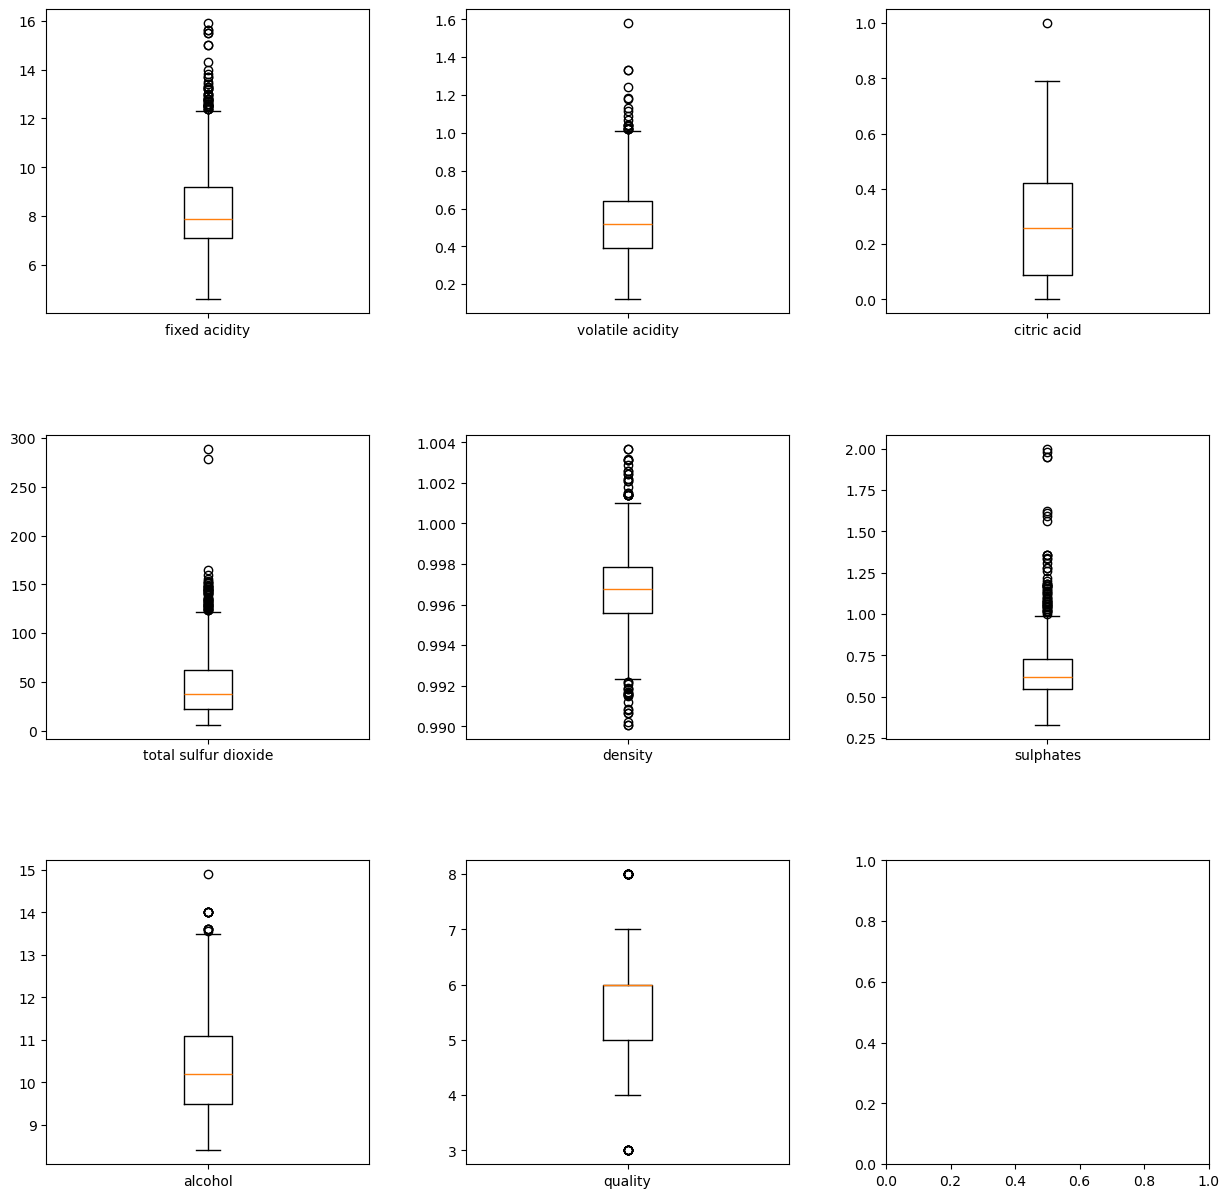

In [3]:
import matplotlib.pyplot as plt

labels = df3.columns.to_list()

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.3) 

for i in range(8):
    ax[i // 3, i % 3].boxplot(df3.loc[:,[labels[i]]], tick_labels = [labels[i]])

plt.show()

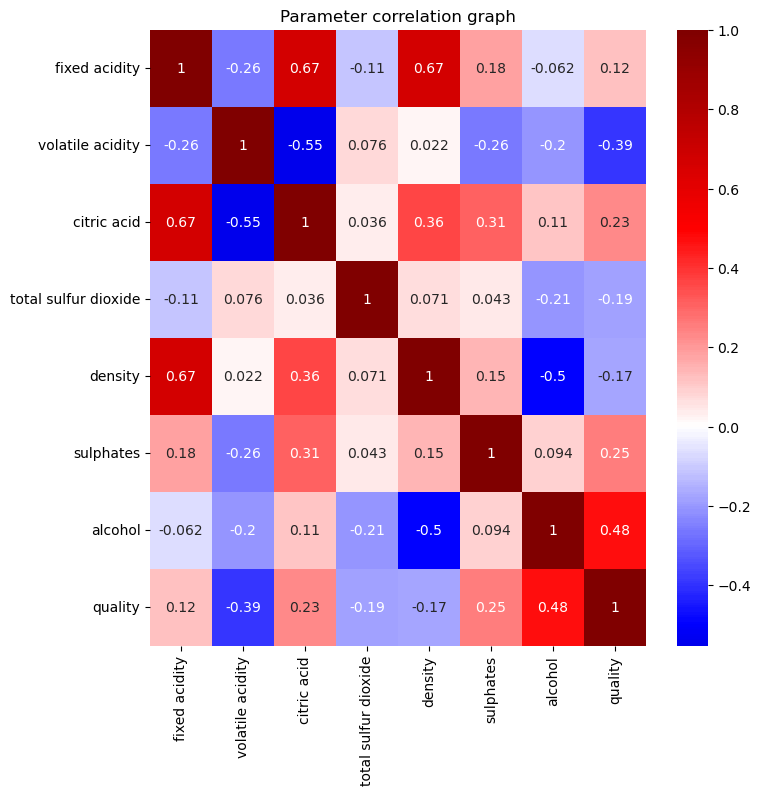

In [4]:
import seaborn as seaborn
plt.figure(figsize=(8, 8))
seaborn.heatmap(df3.corr(), annot=True, cmap='seismic', center=0)
plt.title('Parameter correlation graph')
plt.show()

In [5]:
list_col = df3.drop('quality', axis=1).columns.to_list()
list_col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm

x = df3.loc[:,list_col].to_numpy()
y = df3.loc[:,['quality']].to_numpy().flatten()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [7]:
log = LogisticRegression().fit(x_train, y_train)
reg = LinearRegression().fit(x_train, y_train)
lasso_1 = Lasso(alpha=0.3).fit(x_train, y_train)
lasso_2 = Lasso(alpha=0.7).fit(x_train, y_train)
ridge_1 = Ridge(alpha=0.3).fit(x_train, y_train)
ridge_2 = Ridge(alpha=0.7).fit(x_train, y_train)
log_l1_1 = LogisticRegression(penalty='l1', solver = 'liblinear', C = 0.1).fit(x_train, y_train)
log_l1_2 = LogisticRegression(penalty='l1', solver = 'liblinear', C = 10).fit(x_train, y_train)
log_l2_1 = LogisticRegression(penalty='l2', C = 0.1).fit(x_train, y_train)
log_l2_2 = LogisticRegression(penalty='l2', C = 10).fit(x_train, y_train)
vector_1 = svm.SVC(C = 0.1).fit(x_train, y_train)
vector_2 = svm.SVC(C = 10).fit(x_train, y_train)

D:\zmei\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\zmei\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\zme

In [8]:
print('коробочные решения')
print('метрика обучения / теста для:')
print(f'линейная регрессия: {round(reg.score(x_train, y_train), 2)} / {round(reg.score(x_test, y_test), 2)}')
print(f'линейная регрессия c L1 регуляризацией и параметром alpha = 0.3: {round(lasso_1.score(x_train, y_train), 2)} / {round(lasso_1.score(x_test, y_test), 2)}')
print(f'линейная регрессия c L1 регуляризацией и параметром alpha = 0.7: {round(lasso_2.score(x_train, y_train), 2)} / {round(lasso_2.score(x_test, y_test), 2)}')
print(f'линейная регрессия c L2 регуляризацией и параметром alpha = 0.3: {round(ridge_1.score(x_train, y_train), 2)} / {round(ridge_1.score(x_test, y_test), 2)}')
print(f'линейная регрессия c L2 регуляризацией и параметром alpha = 0.7: {round(ridge_2.score(x_train, y_train), 2)} / {round(ridge_2.score(x_test, y_test), 2)}')
print(f'логистическая регрессия: {round(log.score(x_train, y_train), 2)} / {round(log.score(x_test, y_test), 2)}')
print(f'логистическая регрессия c L1 регуляризацией и параметром C = 0.1: {round(log_l1_1.score(x_train, y_train), 2)} / {round(log_l1_1.score(x_test, y_test), 2)}')
print(f'логистическая регрессия c L1 регуляризацией и параметром C = 10: {round(log_l1_2.score(x_train, y_train), 2)} / {round(log_l1_2.score(x_test, y_test), 2)}')
print(f'логистическая регрессия c L2 регуляризацией и параметром C = 0.1: {round(log_l2_1.score(x_train, y_train), 2)} / {round(log_l2_1.score(x_test, y_test), 2)}')
print(f'логистическая регрессия c L2 регуляризацией и параметром C = 10: {round(log_l2_2.score(x_train, y_train), 2)} / {round(log_l2_2.score(x_test, y_test), 2)}')
print(f'метод опорных векторов с параметром С = 0.1: {round(vector_1.score(x_train, y_train), 2)} / {round(vector_1.score(x_test, y_test), 2)}')
print(f'метод опорных векторов с параметром С = 10: {round(vector_2.score(x_train, y_train), 2)} / {round(vector_2.score(x_test, y_test), 2)}')

коробочные решения
метрика обучения / теста для:
линейная регрессия: 0.34 / 0.41
линейная регрессия c L1 регуляризацией и параметром alpha = 0.3: 0.11 / 0.11
линейная регрессия c L1 регуляризацией и параметром alpha = 0.7: 0.03 / 0.04
линейная регрессия c L2 регуляризацией и параметром alpha = 0.3: 0.34 / 0.4
линейная регрессия c L2 регуляризацией и параметром alpha = 0.7: 0.34 / 0.4
логистическая регрессия: 0.56 / 0.56
логистическая регрессия c L1 регуляризацией и параметром C = 0.1: 0.55 / 0.59
логистическая регрессия c L1 регуляризацией и параметром C = 10: 0.59 / 0.59
логистическая регрессия c L2 регуляризацией и параметром C = 0.1: 0.56 / 0.56
логистическая регрессия c L2 регуляризацией и параметром C = 10: 0.57 / 0.57
метод опорных векторов с параметром С = 0.1: 0.49 / 0.51
метод опорных векторов с параметром С = 10: 0.57 / 0.56


In [9]:
y_unique = np.unique(y_train)
y_unique 

array([3, 4, 5, 6, 7, 8])

In [10]:
#разложение по классам "один против всех"
y_train_unique = []
for k in range(len(y_unique)):
    temp = []
    for i in range(len(y_train)):
        if y_train[i] == y_unique[k]:
            temp.append(1)
        else:
            temp.append(-1)
    y_train_unique.append(temp)

In [47]:
# обучение по методу опорных векторов

C = 10
learning_rate = 0.001
lambda_p = 1 / C
num_epoch = 1000

x_train_2 = np.c_[np.ones((len(x_train), 1)), x_train]

w_total = []

for l in range(len(y_train_unique)):
    w = np.zeros(x_train_2.shape[1])
    for k in range(num_epoch):
        loss = 0
        for i in range(len(x_train_2)):
            loss += max(0, 1-(y_train_unique[l][i] * np.dot(x_train_2[i], w)))
            if (y_train_unique[l][i] * np.dot(x_train_2[i], w)) >= 1:
                dw = (lambda_p * w) / len(x_train_2)
            else:
                dw = (lambda_p * w - y_train_unique[l][i] * x_train_2[i]) / len(x_train_2)
            w -= learning_rate * dw
    w_total.append(w)


In [48]:
# создание итоговых предсказанных классов

x_test_2 = np.c_[np.ones((len(x_test), 1)), x_test]

y_train_predict = []
y_test_predict = []

for i in range(len(y_train)):
    temp = []
    for j in range(len(y_train_unique)):
        temp.append(np.dot(x_train_2[i], w_total[j]))
    num_max = temp.index(max(temp))
    y_train_predict.append(y_unique[num_max])

for i in range(len(y_test)):
    temp = []
    for j in range(len(y_train_unique)):
        temp.append(np.dot(x_test_2[i], w_total[j]))
    num_max = temp.index(max(temp))
    y_test_predict.append(y_unique[num_max])

In [49]:
def accuracy(true, predict) -> int:
    ok = 0
    for i in range(len(true)):
        if true[i] == predict[i]:
            ok += 1
    return ok / len(true)

In [50]:
print(f'метрика обучения: {round(accuracy(y_train, y_train_predict),2)}, метрика теста: {round(accuracy(y_test, y_test_predict),2)}')

метрика обучения: 0.46, метрика теста: 0.51
